In [1]:
import os
import pandas
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [3]:
#set variables
drive = 'awstest/images_corrected_troubleshooting_'
#batch = '20200211_6W_CP151A2'

# Merge CSVs

In [3]:
#Merge Foci csvs
#Run if csvs are in separate folders
#topfolder = os.path.join(drive, batch, 'images_corrected\\barcoding\\')
topfolder = drive
filename = 'BarcodePreprocessing_BarcodeFoci.csv'

df_dict={}
count = 0
folderlist = os.listdir(topfolder)
print(count, datetime.datetime.ctime(datetime.datetime.now()))
for eachfolder in folderlist:
        if os.path.isfile(os.path.join(topfolder, eachfolder, filename)):
            df_dict[eachfolder]=pandas.read_csv(os.path.join(topfolder, eachfolder, filename),index_col=False)
            count+=1
            if count % 50 == 0:
                print(count, datetime.datetime.ctime(datetime.datetime.now()))
print(count, datetime.datetime.ctime(datetime.datetime.now()))
df_foci = pandas.concat(df_dict, ignore_index=True)
print('done concatenating at', datetime.datetime.ctime(datetime.datetime.now()))

0 Thu Jan 21 08:35:30 2021
50 Thu Jan 21 08:35:44 2021
100 Thu Jan 21 08:35:58 2021
150 Thu Jan 21 08:36:12 2021
200 Thu Jan 21 08:36:27 2021
250 Thu Jan 21 08:36:42 2021
300 Thu Jan 21 08:36:57 2021
350 Thu Jan 21 08:37:12 2021
400 Thu Jan 21 08:37:28 2021
450 Thu Jan 21 08:37:46 2021
500 Thu Jan 21 08:38:02 2021
550 Thu Jan 21 08:38:18 2021
600 Thu Jan 21 08:38:34 2021
650 Thu Jan 21 08:38:54 2021
700 Thu Jan 21 08:39:11 2021
750 Thu Jan 21 08:39:26 2021
775 Thu Jan 21 08:39:35 2021
done concatenating at Thu Jan 21 08:41:09 2021


In [4]:
#Save the merged Foci CSV
focipath = os.path.join(topfolder, 'Foci_Merged.csv')
df_foci.to_csv(focipath)

# Load csvs

In [4]:
#Skip to this point if .csvs don't need to be merged
#load .csvs
df_foci=pandas.read_csv(os.path.join(drive, 'Foci_Merged.csv'))

# Barcoding Quality

In [5]:
batch_list = ['99', '995','999','HistogramPreMask_A', 'HistogramPreMask_T',
                       'LoG','LoGNoBackSub','MaskHistARescale','MaskHistogram_A','MaskHistogram_T',
                      'RescaleAfterMask','RescalePostCompensate','RescalePreMask', 'Standard','WholeImage',
                      'WholeImageNoBackSub']


In [6]:
metrics = []
for batch in batch_list:
    metrics.append('Intensity_MedianIntensity_BarcodeScores_IntValues_' +batch)
melted = df_foci.melt(id_vars=['Metadata_Well','Metadata_Plate'], value_vars=metrics,
        var_name='CorrectionProtocol', value_name='Score')


In [7]:
if max(melted['Score'])>1:
    melted['Score']=melted['Score']/65535.0

In [8]:
melted['Usable']=melted.eval('Score > 0.9')
melted['Perfect']=melted.eval('Score >= 1')
melted.head()

,Metadata_Well,Metadata_Plate,CorrectionProtocol,Score,Usable,Perfect
0,Well4,CP186H,Intensity_MedianIntensity_BarcodeScores_IntVal...,0.749996,False,False
1,Well4,CP186H,Intensity_MedianIntensity_BarcodeScores_IntVal...,0.833326,False,False
2,Well4,CP186H,Intensity_MedianIntensity_BarcodeScores_IntVal...,0.749996,False,False
3,Well4,CP186H,Intensity_MedianIntensity_BarcodeScores_IntVal...,0.749996,False,False
4,Well4,CP186H,Intensity_MedianIntensity_BarcodeScores_IntVal...,0.749996,False,False


In [9]:
counts = melted.groupby(['CorrectionProtocol','Metadata_Plate','Metadata_Well']).count()

In [10]:
perperdf = melted.groupby(['CorrectionProtocol','Metadata_Plate','Metadata_Well']).mean()

In [11]:
perperdf['NSpots'] = counts['Score'] #this could be any column

In [12]:
perperdf['PerfectCount']=perperdf['Perfect']*perperdf['NSpots']
perperdf['UsableCount']=perperdf['Usable']*perperdf['NSpots']

In [15]:
perperdf.head()

Score  \
CorrectionProtocol                                 Metadata_Plate Metadata_Well             
Intensity_MedianIntensity_BarcodeScores_IntValu... CP186A         Well1          0.829933   
                                                                  Well2          0.845387   
                                                                  Well3          0.841440   
                                                                  Well4          0.814776   
                                                                  Well5          0.846100   

                                                                                   Usable  \
CorrectionProtocol                                 Metadata_Plate Metadata_Well             
Intensity_MedianIntensity_BarcodeScores_IntValu... CP186A         Well1          0.178184   
                                                                  Well2          0.295402   
                                                                  Well3          0.274221   
                                                                  Well4          0.127261   
                                                                  Well5          0.298707   

                                                                                  Perfect  \
CorrectionProtocol                                 Metadata_Plate Metadata_Well             
Intensity_MedianIntensity_BarcodeScores_IntValu... CP186A         Well1          0.015844   
                                                                  Well2          0.060495   
                                                                  Well3          0.047345   
                                                                  Well4          0.010648   
                                                                  Well5          0.061854   

                                                                                 NSpots  \
CorrectionProtocol                                 Metadata_Plate Metadata_Well           
Intensity_MedianIntensity_BarcodeScores_IntValu... CP186A         Well1          113484   
                                                                  Well2          123002   
                                                                  Well3          122992   
                                                                  Well4          109130   
                                                                  Well5          167023   

                                                                                 PerfectCount  \
CorrectionProtocol                                 Metadata_Plate Metadata_Well                 
Intensity_MedianIntensity_BarcodeScores_IntValu... CP186A         Well1                1798.0   
                                                                  Well2                7441.0   
                                                                  Well3                5823.0   
                                                                  Well4                1162.0   
                                                                  Well5               10331.0   

                                                                                 UsableCount  
CorrectionProtocol                                 Metadata_Plate Metadata_Well               
Intensity_MedianIntensity_BarcodeScores_IntValu... CP186A         Well1              20221.0  
                                                                  Well2              36335.0  
                                                                  Well3              33727.0  
                                                                  Well4              13888.0  
                                                                  Well5              49891.0

In [16]:
perperdf = perperdf.reset_index()

In [17]:
perperdf.to_csv('summary.csv',index=False)

In [18]:
perplate= melted.groupby(['CorrectionProtocol','Metadata_Plate']).mean()
perplate.head()

Score  \
CorrectionProtocol                                 Metadata_Plate             
Intensity_MedianIntensity_BarcodeScores_IntValu... CP186A          0.851991   
                                                   CP186B          0.840390   
                                                   CP186C          0.848398   
                                                   CP186D          0.839983   
                                                   CP186E          0.857391   

                                                                     Usable  \
CorrectionProtocol                                 Metadata_Plate             
Intensity_MedianIntensity_BarcodeScores_IntValu... CP186A          0.325790   
                                                   CP186B          0.259687   
                                                   CP186C          0.316217   
                                                   CP186D          0.270158   
                                                   CP186E          0.373680   

                                                                    Perfect  
CorrectionProtocol                                 Metadata_Plate            
Intensity_MedianIntensity_BarcodeScores_IntValu... CP186A          0.104132  
                                                   CP186B          0.042648  
                                                   CP186C          0.065846  
                                                   CP186D          0.056750  
                                                   CP186E          0.120075

In [21]:
perplate=perplate.reset_index()

In [22]:
perplate.to_csv('summary_perplate.csv',index=False)

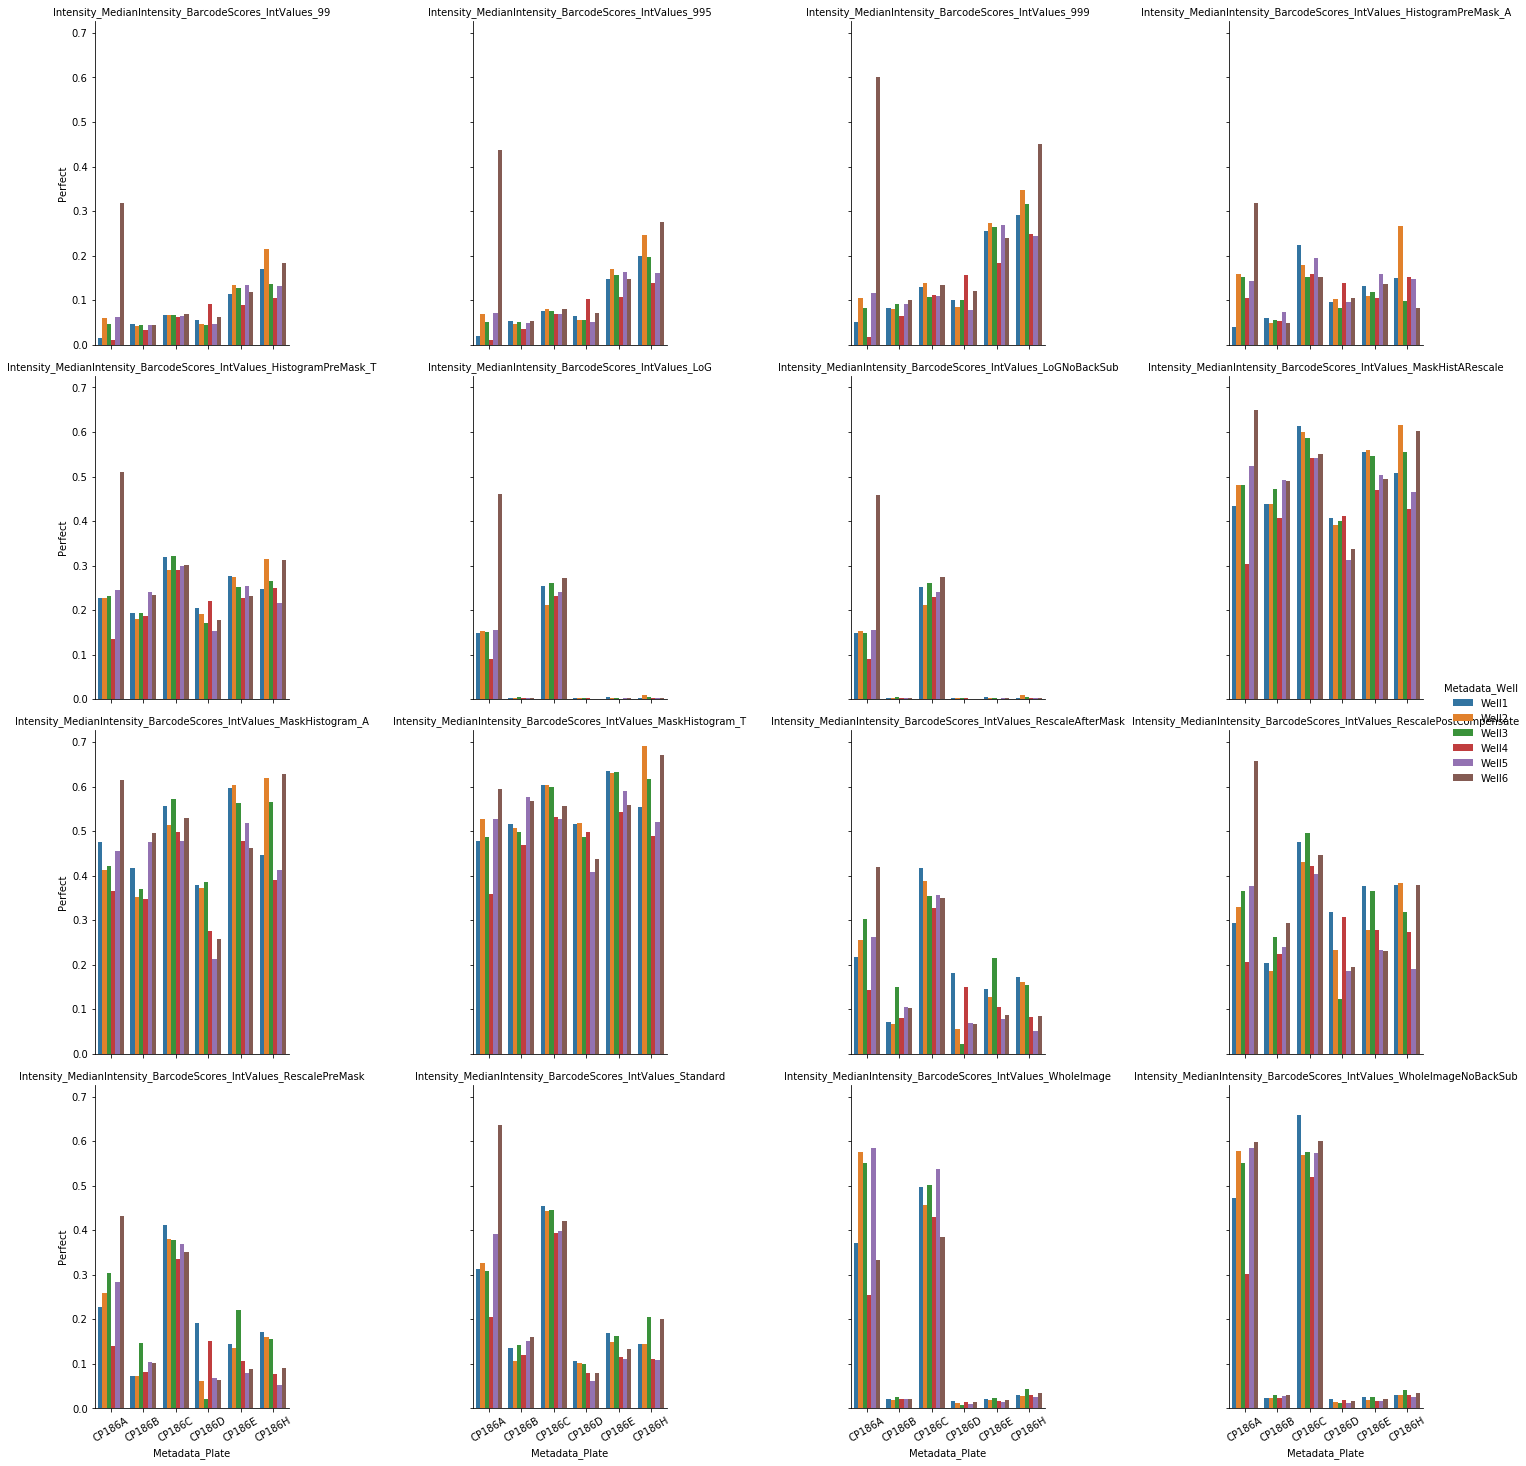

In [19]:
g = sns.catplot(data=perperdf, kind='bar',x='Metadata_Plate',y='Perfect',hue='Metadata_Well',col='CorrectionProtocol',col_wrap=4)
g.set_xticklabels(rotation=30)
g.set_titles(col_template = '{col_name}')

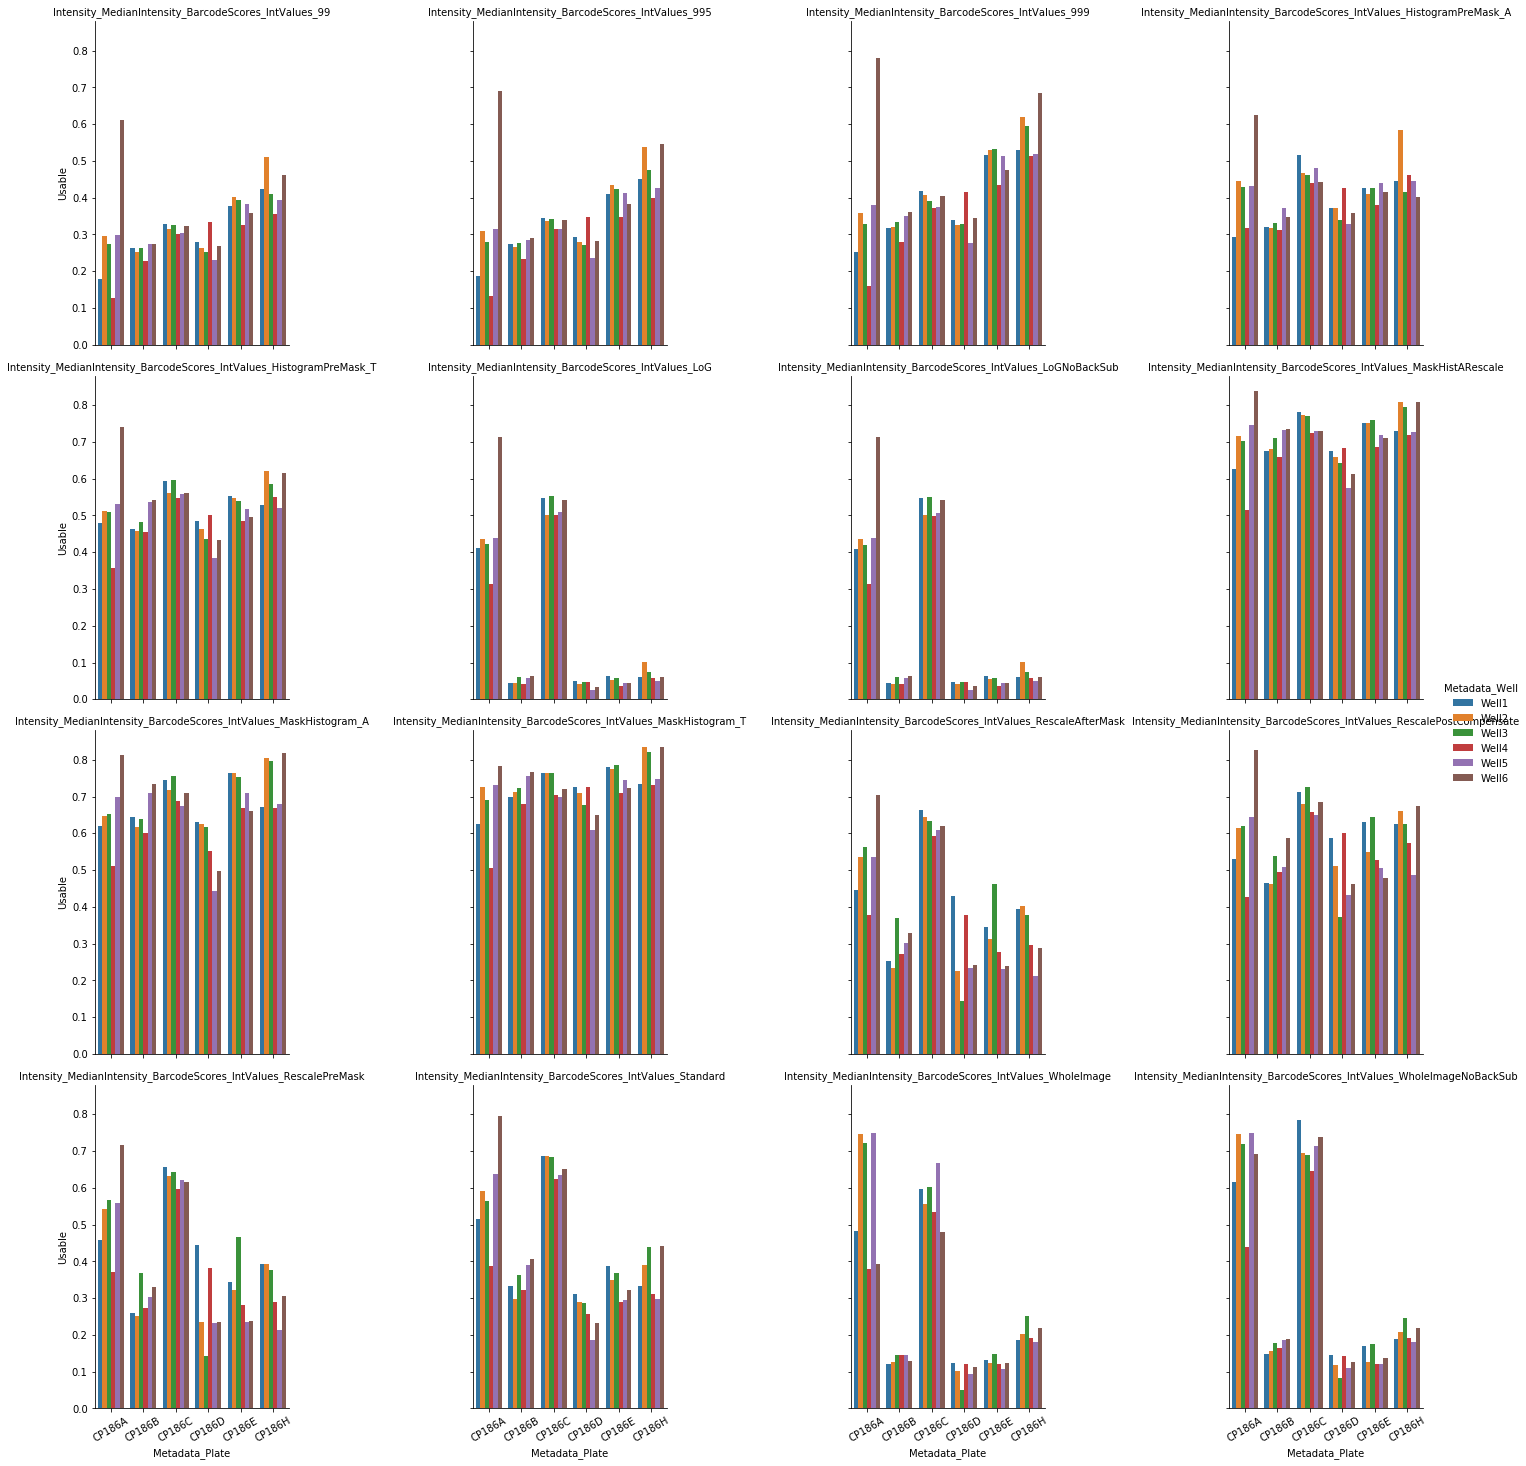

In [20]:
g = sns.catplot(data=perperdf, kind='bar',x='Metadata_Plate',y='Usable',hue='Metadata_Well',col='CorrectionProtocol',col_wrap=4)
g.set_xticklabels(rotation=30)
g.set_titles(col_template = '{col_name}')

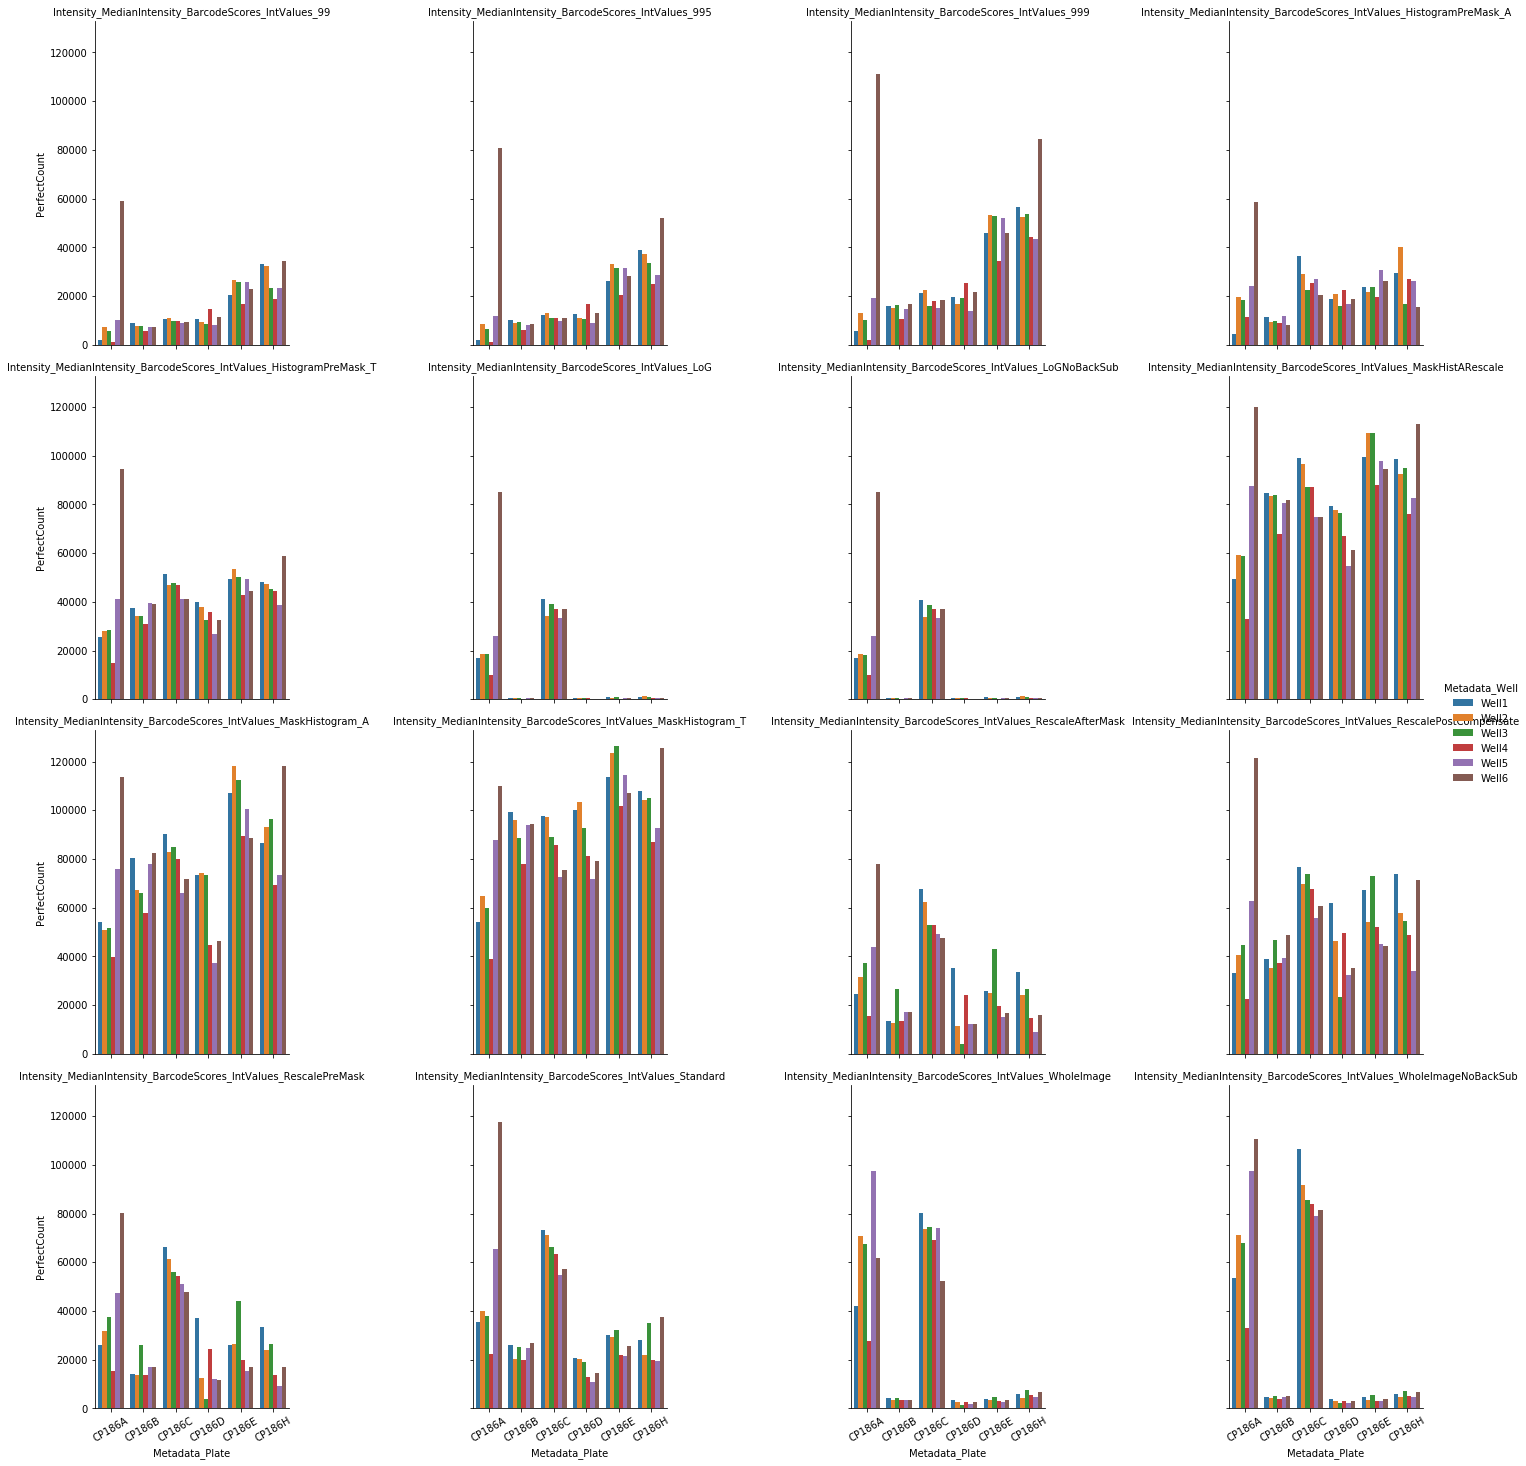

In [21]:
g = sns.catplot(data=perperdf, kind='bar',x='Metadata_Plate',y='PerfectCount',hue='Metadata_Well',col='CorrectionProtocol',col_wrap=4)
g.set_xticklabels(rotation=30)
g.set_titles(col_template = '{col_name}')

In [12]:
barcode_metric_list = batch_list

for barcode_metric_diff in barcode_metric_list:
    barcode_metric = 'Intensity_MedianIntensity_BarcodeScores_IntValues_' + barcode_metric_diff
    #barcode_metric = 'Barcode_MatchedTo_Score'
    if max(df_foci[barcode_metric]) > 1:
        df_foci[barcode_metric] = df_foci[barcode_metric]/65535.0
    print(barcode_metric)
    print("%Barcodes with match > .9:")
    print( sum(df_foci[barcode_metric]>0.9)*100.0/sum(df_foci[barcode_metric]>0))
    print("%Barcodes with perfect match:")
    percent_perfect = sum(df_foci[barcode_metric]==1)*100.0/sum(df_foci[barcode_metric]>0)
    print(percent_perfect)
    print("Number of perfect barcodes:")
    print(sum(df_foci[barcode_metric]==1))

Intensity_MedianIntensity_BarcodeScores_IntValues_99
%Barcodes with match > .9:
32.89566755664158
%Barcodes with perfect match:
9.126037638786546
Number of perfect barcodes:
556328
Intensity_MedianIntensity_BarcodeScores_IntValues_995
%Barcodes with match > .9:
35.27192681427258
%Barcodes with perfect match:
11.296065059812483
Number of perfect barcodes:
688614
Intensity_MedianIntensity_BarcodeScores_IntValues_999
%Barcodes with match > .9:
42.62247106816018
%Barcodes with perfect match:
18.012067482363996
Number of perfect barcodes:
1098025
Intensity_MedianIntensity_BarcodeScores_IntValues_HistogramPreMask_A
%Barcodes with match > .9:
41.05106058806585
%Barcodes with perfect match:
12.655551494639482
Number of perfect barcodes:
771489
Intensity_MedianIntensity_BarcodeScores_IntValues_HistogramPreMask_T
%Barcodes with match > .9:
52.13920419314009
%Barcodes with perfect match:
24.645344232627938
Number of perfect barcodes:
1502393
Intensity_MedianIntensity_BarcodeScores_IntValues_LoG
%